## Slide Deck

### Description

Data visualization is an important skill that is used in many parts of the data analysis process. Exploratory data visualization generally occurs during and after the data wrangling process, and is the main method that you will use to understand the patterns and relationships present in your data. This understanding will help you approach any statistical analyses and will help you build conclusions and findings. This process might also illuminate additional data cleaning tasks to be performed. Explanatory data visualization techniques are used after generating your findings, and are used to help communicate your results to others. Understanding design considerations will make sure that your message is clear and effective. In addition to being a good producer of visualizations, going through this project will also help you be a good consumer of visualizations that are presented to you by others

this dataset is an interesting data set we have diversity attributes and that help us do a good explorate also it talks about an amazing subject which is bike sharing and a lot of information in this subject  

### Extract Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fc = pd.read_csv('fordgobike_clean.csv')
fc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No,869.750000
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No,1030.900000
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No,608.166667
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes,26.416667
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200.0,Subscriber,1959.0,Male,No,29.883333


In [3]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28137 entries, 0 to 28136
Data columns (total 17 columns):
duration_sec               28137 non-null int64
start_time                 28137 non-null object
end_time                   28137 non-null object
start_station_id           28137 non-null float64
start_station_name         28137 non-null object
start_station_latitude     28137 non-null float64
start_station_longitude    28137 non-null float64
end_station_id             28137 non-null float64
end_station_name           28137 non-null object
end_station_latitude       28137 non-null float64
end_station_longitude      28137 non-null float64
bike_id                    28137 non-null float64
user_type                  28137 non-null object
member_birth_year          28137 non-null float64
member_gender              28137 non-null object
bike_share_for_all_trip    28137 non-null object
duration_min               28137 non-null float64
dtypes: float64(9), int64(1), object(7)
memory usa

## Visualization Data

## Univariate Exploration

## How much the counts of gender are?

We see that in out data the member gender that a lot of them is male and it is more than 20000 and female is between 5000 and 7500

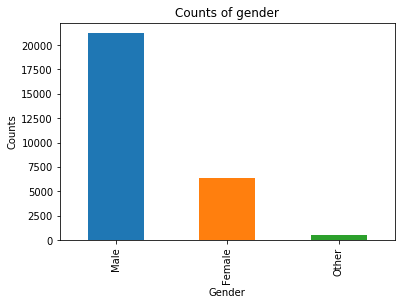

In [4]:
#We will draw a diagram for counts of gender

gender_counts = fc['member_gender'].value_counts()
gender_counts.plot(kind='bar') #kind of diagram is bar
plt.title('Counts of gender') #Title for the diagram
plt.xlabel('Gender') #Name for xlable
plt.ylabel('Counts'); #Name for ylable

## How much the counts of bike share are?

We see that in out data that a lot of people do not love to share their bikes and there are more than 25000 and about 2500 do not love to share their bikes

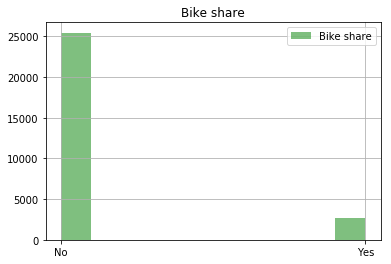

In [5]:
#We will draw a diagram for bike share

fc.bike_share_for_all_trip.hist(alpha=0.5, label='Bike share',color='green')
plt.title('Bike share') #Title for the diagram
plt.legend();

## How much the counts of user type are?

We see that in our data a lot of users are subscribe and it is about 92.4% on the other on the other hand the customer is about 7.6%

In [6]:
fc['user_type'].value_counts()

Subscriber    26005
Customer       2132
Name: user_type, dtype: int64

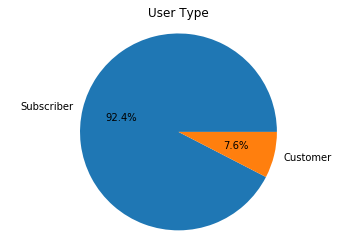

In [6]:
#We will draw a diagram for user_type
user_counts = [26005,2132] #Values of user_type
user_type = 'Subscriber','Customer' #Name of values of user_type
plt.pie(user_counts,labels=user_type,autopct='%1.1f%%')
plt.title('User Type') #Title of diagram
plt.axis('equal')
plt.show();

## How much the duration second time is?

We see that it takes a small time and it is reach to 200 but most of them is less than that

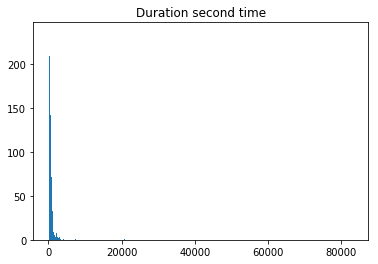

In [7]:
#We will draw a diagram for duration_sec

bins = np.arange(20, fc['duration_sec'].max()+5, 5) #The colmuns and info we need in the diagram
plt.title('Duration second time') #Title of diagram
plt.hist(fc['duration_sec'], bins = bins); #Kind of diagram is bins

## Bivariate Exploration

## What is the relation between type of user and duration minutes?

We see that subscriber take more duration than customer and a lot of them take less than 400 minutes but subscriber also reach to 1400 minutes

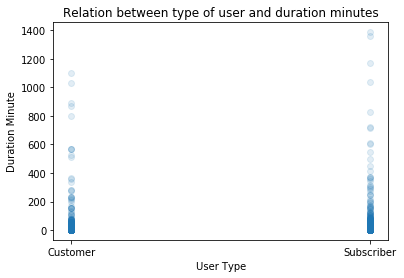

In [8]:
#We will draw a diagram for relation between type of user and duration_min

plt.scatter(data = fc, x='user_type', y='duration_min', alpha = 1/8) #Colmuns
plt.xlabel('User Type') #Name of xlabel
plt.title('Relation between type of user and duration minutes') #Title of diagram
plt.ylabel('Duration Minute'); #Name of ylabel

## What is the relation between gender and birth year?

We see that a lot of people who use bike are young because they have much energy than the older and the most birth year is between 1980 and 2000

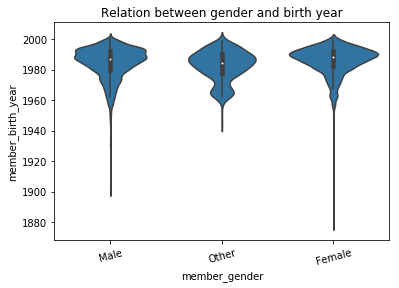

In [9]:
#We will draw a diagram for relation between gender and birth year

base_color = sb.color_palette()[0]
sb.violinplot(data = fc, x = 'member_gender', y = 'member_birth_year',color = base_color) #Colmuns
plt.title('Relation between gender and birth year') #Title of the diagram
plt.xticks(rotation = 15);

## Multivariate Exploration

## What is the relation between start and end latitude according to duration minutes?

We see that the start and end latitude take a lot of minutes and it is take between 1000 and 1200 minutes

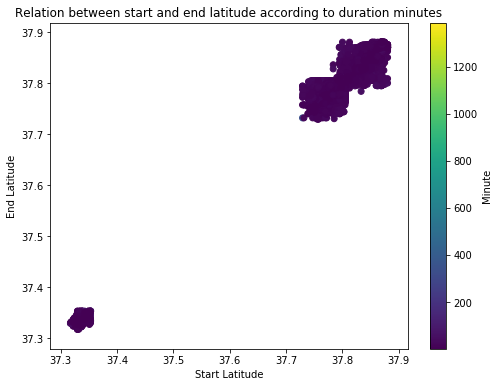

In [10]:
#We will draw a diagram for  relation between start and end latitude according to duration_min

plt.figure(figsize = [8,6]) #Size of figure
plt.scatter(data = fc, x = 'start_station_latitude', y = 'end_station_latitude', c = 'duration_min') #Columns
plt.colorbar(label = 'Minute')
plt.title('Relation between start and end latitude according to duration minutes') #Title of diagram
plt.xlabel('Start Latitude') #Name of xlabel
plt.ylabel('End Latitude'); #Name of ylabel

## What is the relation between gender and type of user to duration minutes?

We see that the most type of user is subscriber and the subscriber take more minutes than customer and a lot of them take less than 250 minutes

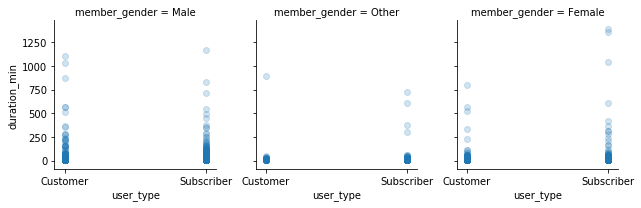

In [11]:
#We will draw a diagram for relation between type of user and duration_min

r = sb.FacetGrid(data = fc, col = 'member_gender', size = 3, col_wrap = 3) #Colmuns
r.map(plt.scatter, 'user_type','duration_min', alpha = 1/5); #Kind of diagram

## Summary

First we gather and assess our data then we clean it , then we use plotting and Visualization to help us discover and understand our data

In the Visualization we saw the counts of gender and type of user and we saw that the male and subsecriber are the most in the data , and we saw that a lot of people do not like to share their bike , finally we saw the relashion between start and end latitude and between gender and type of user according to duration minutes and we saw that the start, end and subsecriber are take a lot of minutes

## Key insight

We see that in out data the member gender that a lot of them is male and it is more than 20000 and female is between 5000 and 7500

We see that in out data that a lot of people do not love to share their bikes and there are more than 25000 and about 2500 do not love to share their bikes

We see that in our data a lot of users are subscribe and it is about 92.4% on the other on the other hand the customer is about 7.6%

We see that it takes a small time and it is reach to 200 but most of them is less than that

We see that subscriber take more duration than customer and a lot of them take less than 400 minutes but subscriber also reach to 1400 minutes

We see that a lot of people who use bike are young because they have much energy than the older and the most birth year is between 1980 and 2000

We see that the most type of user is subscriber and the subscriber take more minutes than customer and a lot of them take less than 250 minutes

We see that the start and end latitude take a lot of minutes and it is take between 1000 and 1200 minutes